In [1]:
pip install requests

In [9]:
!pip install tweepy

   ---------------------------------------- 0.0/99.4 kB ? eta -:--:--
   ---------------- ----------------------- 41.0/99.4 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 99.4/99.4 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/151.7 kB ? eta -:--:--
   ---------------------------------------- 151.7/151.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
import requests
import pandas as pd

# RapidAPI credentials
rapidapi_key = "f0e2c3be4dmsh59175fd2b0cd929p1256a3jsn025f11407dba"

# Twitter API credentials
consumer_key = "jzWkfHQiWhFuhR8jrI0HHSxLF"
consumer_secret = "pXLqs8qtG5KlzgicXnykhfL9Sz9ux5udFJtadED9fLadTXU23E"
access_token = "1238761143167889410-ER8glGeQRC3fqn6SGS2TVBTVGDZmSj"
access_token_secret = "31n8tZVi5w611GfC0DqLa7SocIzumeRxzO7j0M9kvJwsj"

# Endpoint URL
url = "https://twitter-api45.p.rapidapi.com/Search"

# Query parameters
query = "Python"
count = 100

# Headers
headers = {
    "X-RapidAPI-Key": rapidapi_key,
    "X-RapidAPI-Host": "twitter-api45.p.rapidapi.com"
}

# Parameters
params = {
    "q": query,
    "count": count,
    "result_type": "recent",
    "lang": "en"
}

# OAuth1 authentication
from requests_oauthlib import OAuth1
auth = OAuth1(consumer_key, consumer_secret, access_token, access_token_secret)

# Make the request
response = requests.get(url, headers=headers, params=params, auth=auth)

# Check if the request was successful
if response.status_code == 200:
    tweets = response.json()["statuses"]

    # Extract relevant fields
    tweet_data = []
    for tweet in tweets:
        tweet_data.append({
            "Tweet ID": tweet["id_str"],
            "Screen Name": tweet["user"]["screen_name"],
            "Favorites": tweet["favorite_count"],
            "Replies": tweet["reply_count"] if "reply_count" in tweet else 0,
            "Retweets": tweet["retweet_count"],
            "Quotes": tweet["quote_count"] if "quote_count" in tweet else 0,
            "Created At": tweet["created_at"],
            "Text": tweet["text"],
            "Language": tweet["lang"]
        })

    # Convert to DataFrame
    df = pd.DataFrame(tweet_data)

    # Display DataFrame
    print(df)

    # Save to CSV
    df.to_csv("tweets_data.csv", index=False)
else:
    print(f"Error: {response.status_code} - {response.text}")


In [5]:
import pandas as pd

# Read all 5 Excel files into separate DataFrames
files = [
    r'C:\Users\sayen\Downloads\csv1.xlsx',
    r'C:\Users\sayen\Downloads\csv2.xlsx',
    r'C:\Users\sayen\Downloads\csv3.xlsx',
    r'C:\Users\sayen\Downloads\csv4.xlsx',
    r'C:\Users\sayen\Downloads\csv5.xlsx'
]
dfs = [pd.read_excel(file) for file in files]  # Use pd.read_excel for .xlsx files

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Drop exact duplicate rows
combined_df = combined_df.drop_duplicates()

# Handle duplicates based on a specific column (optional, e.g., 'ID')
if 'ID' in combined_df.columns:
    combined_df = combined_df.drop_duplicates(subset=['ID'])

# Save the cleaned and combined DataFrame to a new CSV file
combined_df.to_csv(r'C:\Users\sayen\Downloads\combined_cleaned_file.csv', index=False)

print("Duplicate handling is complete. Combined data saved to 'combined_cleaned_file.csv'.")


Duplicate handling is complete. Combined data saved to 'combined_cleaned_file.csv'.


In [11]:
import pandas as pd

# Load the data
# Replace the file path with your actual data file path
file_path = r"C:\Users\sayen\Downloads\combined_cleaned_file.csv"
data = pd.read_csv(file_path)

# Overview of the retrieved data
print("=== Data Overview ===")
print(f"Number of records: {data.shape[0]}")
print(f"Number of attributes (columns): {data.shape[1]}")
print("\nColumn Names:")
print(data.columns.tolist())
print("\nData Types:")
print(data.dtypes)

# Display the first few rows
print("\nSample Data:")
print(data.head())

# Summarize key insights
print("\n=== Summary of Key Insights ===")

# Missing values
print("\nMissing Values per Column:")
missing_values = data.isnull().sum()
print(missing_values)

# Basic statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
print(data.describe())

# Unique values for categorical columns
print("\nUnique Value Counts for Categorical Columns:")
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].nunique()} unique values")

# Distribution and trends (example for a column like 'likes')
if 'likes' in data.columns:
    print("\nDistribution of Likes:")
    print(data['likes'].value_counts().head(10))

# Summary statistics for engagement metrics (if present)
if {'likes', 'replies', 'retweets'}.issubset(data.columns):
    data['total_engagement'] = data['likes'] + data['replies'] + data['retweets']
    print("\nAverage Total Engagement:")
    print(data['total_engagement'].mean())

# Check for duplicates
print("\nDuplicate Rows in Data:")
print(data.duplicated().sum())


=== Data Overview ===
Number of records: 3237
Number of attributes (columns): 112

Column Names:
['avatar', 'fullname', 'id', 'images/0', 'images/1', 'images/2', 'images/3', 'isQuote', 'isReply', 'isRetweet', 'likes', 'links/0', 'links/1', 'links/2', 'links/3', 'links/4', 'links/5', 'links/6', 'links/7', 'links/8', 'links/9', 'links/10', 'links/11', 'links/12', 'links/13', 'links/14', 'links/15', 'links/16', 'links/17', 'quotedTweet/avatar', 'quotedTweet/fullname', 'quotedTweet/images/0', 'quotedTweet/images/1', 'quotedTweet/images/2', 'quotedTweet/images/3', 'quotedTweet/links/0', 'quotedTweet/links/1', 'quotedTweet/links/2', 'quotedTweet/links/3', 'quotedTweet/links/4', 'quotedTweet/links/5', 'quotedTweet/links/6', 'quotedTweet/links/7', 'quotedTweet/links/8', 'quotedTweet/links/9', 'quotedTweet/links/10', 'quotedTweet/text', 'quotedTweet/timestamp', 'quotedTweet/totalMediaCount', 'quotedTweet/url', 'quotedTweet/user/userId', 'quotedTweet/username', 'quotes', 'replies', 'replyingTo/0

In [17]:
import pandas as pd

# Load the original data
file_path = r"C:\Users\sayen\Downloads\combined_cleaned_file.csv"  # Update the file path accordingly
data = pd.read_csv(file_path)

# Select only the necessary columns
selected_columns = [
    'id','likes', 'replies', 'retweets', 'quotes',  # Engagement Metrics
    'text', 'isReply', 'isRetweet', 'isQuote', 'quotedTweet/text',  # Content
    'timestamp', 'quotedTweet/timestamp',  # Time
    'username', 'verified'  # User Info
]

# Check if all selected columns are in the dataset
available_columns = [col for col in selected_columns if col in data.columns]

# Filter the data to include only the desired columns
filtered_data = data[available_columns]

# Save the filtered data to a new CSV file
output_path = r"C:\Users\sayen\Downloads\filtered_data.csv"  # Update the output file path accordingly
filtered_data.to_csv(output_path, index=False)

print(f"Filtered data with selected columns saved to: {output_path}")


Filtered data with selected columns saved to: C:\Users\sayen\Downloads\filtered_data.csv


In [21]:
import pandas as pd

# Load the filtered data
filtered_file_path = r"C:\Users\sayen\Downloads\filtered_data.csv"  # Path to filtered data
filtered_data = pd.read_csv(filtered_file_path)

# Remove duplicates based on 'id' (if present in the dataset)
if 'id' in filtered_data.columns:
    filtered_data = filtered_data.drop_duplicates(subset=['id'])
else:
    print("The 'id' column is not present in the filtered data.")

# Save the deduplicated data back to the same file
filtered_data.to_csv(filtered_file_path, index=False)

print(f"Filtered data (with duplicates removed) has been saved back to: {filtered_file_path}")


Filtered data (with duplicates removed) has been saved back to: C:\Users\sayen\Downloads\filtered_data.csv


In [25]:
import pandas as pd

# Load the filtered data
filtered_file_path = r"C:\Users\sayen\Downloads\filtered_data.csv"  # Path to filtered data
filtered_data = pd.read_csv(filtered_file_path)

# Remove the 'id' column (if present in the dataset)
if 'id' in filtered_data.columns:
    filtered_data = filtered_data.drop(columns=['id'])
    print("'id' column has been removed.")
else:
    print("The 'id' column is not present in the filtered data.")

# Save the updated data back to the same file
filtered_data.to_csv(filtered_file_path, index=False)

print(f"Updated filtered data has been saved back to: {filtered_file_path}")


'id' column has been removed.
Updated filtered data has been saved back to: C:\Users\sayen\Downloads\filtered_data.csv


In [27]:
import pandas as pd

# Load the filtered dataset
file_path = r"C:\Users\sayen\Downloads\filtered_data.csv"  # Update the path if necessary
data = pd.read_csv(file_path)

# Display the remaining columns
print("Remaining Columns:")
print(data.columns.tolist())


Remaining Columns:
['likes', 'replies', 'retweets', 'quotes', 'text', 'isReply', 'isRetweet', 'isQuote', 'quotedTweet/text', 'timestamp', 'quotedTweet/timestamp', 'username', 'verified']


In [29]:
import pandas as pd

# Load the filtered dataset
file_path = r"C:\Users\sayen\Downloads\filtered_data.csv"  # Update the path if necessary
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("=== Basic Dataset Information ===")
print(data.info())

# Display the first few rows of the dataset
print("\nSample Rows from Dataset:")
print(data.head())

# Calculate descriptive statistics for numerical columns
print("\n=== Descriptive Statistics (Numerical Columns) ===")
print(data.describe())

# Check for missing values in each column
print("\n=== Missing Values ===")
print(data.isnull().sum())

# Count unique values for categorical columns
print("\n=== Unique Values in Categorical Columns ===")
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].nunique()} unique values")


=== Basic Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   likes                  2662 non-null   int64 
 1   replies                2662 non-null   int64 
 2   retweets               2662 non-null   int64 
 3   quotes                 2662 non-null   int64 
 4   text                   2660 non-null   object
 5   isReply                2662 non-null   bool  
 6   isRetweet              2662 non-null   bool  
 7   isQuote                2662 non-null   bool  
 8   quotedTweet/text       253 non-null    object
 9   timestamp              2662 non-null   object
 10  quotedTweet/timestamp  256 non-null    object
 11  username               2662 non-null   object
 12  verified               2662 non-null   bool  
dtypes: bool(4), int64(4), object(5)
memory usage: 197.7+ KB
None

Sample Rows from Dataset:
 

Data validation 

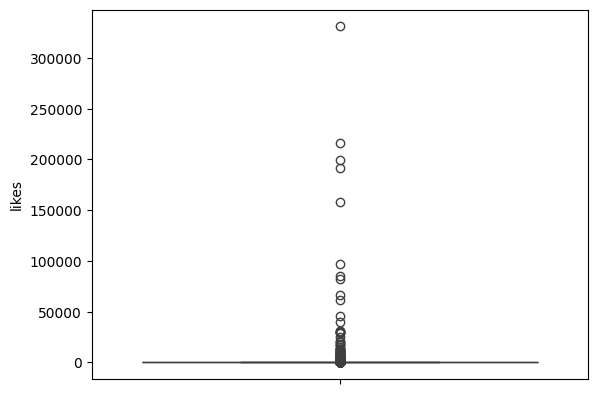

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot a boxplot for likes
sns.boxplot(data['likes'])
plt.show()

# Remove rows with outliers (e.g., beyond a threshold)
data = data[data['likes'] < data['likes'].quantile(0.99)]  # Keep rows below the 99th percentile


In [40]:
from sklearn.preprocessing import StandardScaler

# Normalize numeric columns for consistency
scaler = StandardScaler()
data[['likes', 'replies', 'retweets']] = scaler.fit_transform(data[['likes', 'replies', 'retweets']])


In [42]:
# Validate business rules
data = data[(data['likes'] >= 0) & (data['retweets'] >= 0) & (data['quotes'] >= 0)]


In [44]:
required_columns = ['text', 'likes', 'replies', 'timestamp']
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"Missing Columns: {missing_columns}")
else:
    print("All required columns are present.")


All required columns are present.
